<a href="https://colab.research.google.com/github/RaoSharjeelKhan/Machine-Learning/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Dependencies
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
#Importing model from tensorflow hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
#Creating a function to upload image and to do some pre-processing
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [19]:
#Uploading content and style images
content_image = load_image('/content/aaa-removebg-preview.jpg')
style_image = load_image('/content/pexels-steve-johnson-1109354.jfif')
  

In [20]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

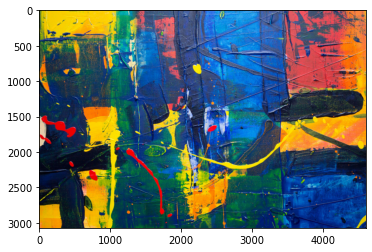

In [21]:
plt.imshow(np.squeeze(style_image))
plt.show()

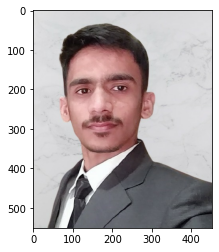

In [22]:
plt.imshow(np.squeeze(content_image))
plt.show()

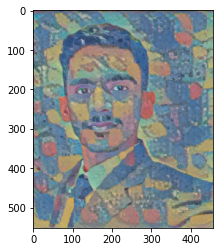

In [23]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))
